<a href="https://colab.research.google.com/github/daniilpopoff/petprogects/blob/main/mask_recognition_part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os 
import pathlib 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import random
import cv2
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

from google.colab import files
from sklearn.metrics import classification_report,confusion_matrix
     




In [ ]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"daniilpopoff","key":"2177f88c40894bf6488ad4ee34d97761"}'}

In [ ]:
os.environ["KAGGLE_CONFIG_DIR"] = "/content"

In [ ]:
!kaggle datasets download -d prithwirajmitra/covid-face-mask-detection-dataset

 99% 206M/207M [00:11<00:00, 20.6MB/s]
100% 207M/207M [00:11<00:00, 19.4MB/s]


In [ ]:
!unzip \*.zip

Archive:  covid-face-mask-detection-dataset.zip
  inflating: New Masks Dataset/Test/Mask/2070.jpg  
  inflating: New Masks Dataset/Test/Mask/2072.jpg  
  inflating: New Masks Dataset/Test/Mask/2083.jpg  
  inflating: New Masks Dataset/Test/Mask/2085.jpg  
  inflating: New Masks Dataset/Test/Mask/2086.jpg  
  inflating: New Masks Dataset/Test/Mask/2110.jpg  
  inflating: New Masks Dataset/Test/Mask/2113.jpg  
  inflating: New Masks Dataset/Test/Mask/2114.jpeg  
  inflating: New Masks Dataset/Test/Mask/2130.jpg  
  inflating: New Masks Dataset/Test/Mask/2132.jpg  
  inflating: New Masks Dataset/Test/Mask/2135.jpg  
  inflating: New Masks Dataset/Test/Mask/2154.png  
  inflating: New Masks Dataset/Test/Mask/2158.png  
  inflating: New Masks Dataset/Test/Mask/2159.png  
  inflating: New Masks Dataset/Test/Mask/2160.png  
  inflating: New Masks Dataset/Test/Mask/2170.png  
  inflating: New Masks Dataset/Test/Mask/2172.png  
  inflating: New Masks Dataset/Test/Mask/2173.png  
  inflating: Ne

In [ ]:
for dirpath, dirnames, filenames in os.walk('/content/New Face Masks Dataset'):
  print(f"there are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [ ]:
def view_image(target_dir, target_class):
  target_folder = target_dir + target_class
  random_image = random.sample(os.listdir(target_folder),1)
  print(random_image)
  img = mpimg.imread(target_folder+'/'+ random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off')
  print(f'image shape = {img.shape}')
  return img 

  

['14.jpg']
image shape = (274, 184, 3)


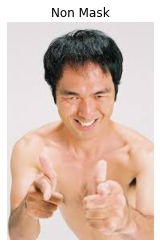

In [ ]:
img = view_image("/content/New Masks Dataset/Train/","Non Mask")

['1574.jpg']
image shape = (633, 1024, 3)


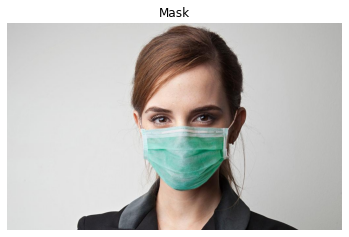

In [ ]:
img = view_image("/content/New Masks Dataset/Train/","Mask")

In [ ]:
data = []
labels = []
nomask = os.listdir("/content/New Masks Dataset/Train/Non Mask/")
for a in nomask:
    img = cv2.imread("/content/New Masks Dataset/Train/Non Mask/"+ a, )
    img = cv2.resize(img,(224, 224))
    data.append(img)
    labels.append(0)

In [ ]:
mask = os.listdir('/content/New Masks Dataset/Train/Mask/')
for a in mask:
  img = cv2.imread('/content/New Masks Dataset/Train/Mask/'+ a,)
  img = cv2.resize(img,(224, 224))
  data.append(img)
  labels.append(1)

In [ ]:
data = np.array(data)/ 255.0
labels = np.array(labels)

In [ ]:
data.shape

(600, 224, 224, 3)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size= 0.1, random_state=42, shuffle= True,
                                                    stratify = (labels))

In [ ]:
base_model = tf.keras.applications.MobileNet(input_shape = [224, 224, 3], weights = 'imagenet', include_top=False)

base_model.trainable = False

model = Flatten()(base_model.output)
model = Dense(units = 256, activation = 'relu')(model)
model = Dense(units = 64, activation = 'relu') (model)
prediction_layer = Dense(units = 1, activation = 'sigmoid')(model)

model = Model(inputs = base_model.input, outputs = prediction_layer)
model.compile(optimizer = 'SGD', loss = 'binary_crossentropy', metrics = ['accuracy'])


17225924/17225924 [==============================] - 2s 0us/step


In [ ]:
model.fit(X_train, y_train, epochs=15,validation_split=0.1, batch_size=32)

Epoch 1/15
16/16 [==============================] - 10s 110ms/step - loss: 0.6099 - accuracy: 0.8601 - val_loss: 0.1206 - val_accuracy: 0.9444
Epoch 2/15
16/16 [==============================] - 1s 43ms/step - loss: 0.0158 - accuracy: 0.9979 - val_loss: 0.1550 - val_accuracy: 0.9444
Epoch 3/15
16/16 [==============================] - 1s 44ms/step - loss: 0.0066 - accuracy: 1.0000 - val_loss: 0.1157 - val_accuracy: 0.9444
Epoch 4/15
16/16 [==============================] - 1s 43ms/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 0.1217 - val_accuracy: 0.9444
Epoch 5/15
16/16 [==============================] - 1s 43ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.1198 - val_accuracy: 0.9444
Epoch 6/15
16/16 [==============================] - 1s 49ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.1175 - val_accuracy: 0.9444
Epoch 7/15
16/16 [==============================] - 1s 43ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.1187 - val_accuracy: 0.9444
Epoch 8/15


In [ ]:
predictions = model.predict(X_test)
predict = []
for i in range(len(predictions)):
  if predictions[i][0] > 0.5:
    predict.append(1)
  else :
    predict.append(0)
print(predictions.shape)
   

2/2 [==============================] - 1s 432ms/step
(60, 1)


In [ ]:
pd.DataFrame(confusion_matrix(y_test, predict),columns= ['No mask','Mask'], index = ['No mask','Mask'])

,No mask,Mask
No mask,30,0
Mask,0,30


In [ ]:
model_name  = "/content/mask_detection_best.h5"
tf.keras.models.save_model(model, model_name)